# Notebook for Investigating Learning Rates Across Technologies

In [7]:
# import csv file: "/Users/clarakumpel/ETH/ISTP/PlotLearningRate/LR_DB_Clara_K.xlsx"
import pandas as pd
import numpy as np
import openpyxl

In [29]:
df = pd.read_excel("LR_DB_Clara_K.xlsx")
df

,Citer3,Citer2,Citer,Technology,Category,Data Source,Data Start year,Data End Year,Location,Learning rate,Data Points,No. of Doublings,R2,Measure,Cumulative Parameter,Price Nominal/Real?,Data Provided,LR provided in lit?,Complete,Comments
0,NaN,NaN,Santa Fe Performance Curve DB,AcrylicFiber,Commodity,Lieberman (1984),1960,1972,USA,0.330729,13,3,0.963846,Price (1966 USD/lbs),Production (Mil. lbs),Real,Y,N,Y,Location confirmed via Personal Communication ...
1,NaN,NaN,Santa Fe Performance Curve DB,Acrylonitrile,Commodity,Lieberman (1984),1959,1972,USA,0.256762,14,3.2,0.904763,Price (1966 USD/lbs),Production (Mil. lbs),Real,Y,N,Y,Location confirmed via Personal Communication ...
2,NaN,NaN,Santa Fe Performance Curve DB,Aluminum,Commodity,Lieberman (1984),1956,1972,USA,0.085996,17,1.9,0.532077,Price (1966 USD/lbs),Production (Mil. lbs),Real,Y,N,Y,Location confirmed via Personal Communication ...
3,NaN,NaN,Santa Fe Performance Curve DB,Ammonia,Commodity,Lieberman (1984),1960,1972,USA,0.439330,13,1.8,0.865633,Price (1966 USD/lbs),Production (Mil. lbs),Real,Y,N,Y,Location confirmed via Personal Communication ...
4,NaN,NaN,Santa Fe Performance Curve DB,Aniline,Commodity,Lieberman (1984),1961,1972,USA,0.476200,12,1,0.895561,Price (1966 USD/lbs),Production (Mil. lbs),Real,Y,N,Y,Location confirmed via Personal Communication ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,NaN,NaN,Santa Fe Performance Curve DB,Urea,Commodity,Lieberman (1984),1961,1972,USA,0.286631,12,2.3,0.889209,Price (1966 USD/lbs),Production (Mil. lbs),Real,Y,N,Y,Location confirmed via Personal Communication ...
92,NaN,NaN,Santa Fe Performance Curve DB,VinylAcetate,Commodity,Lieberman (1984),1960,1972,USA,0.339690,13,2.2,0.928608,Price (1966 USD/lbs),Production (Mil. lbs),Real,Y,N,Y,Location confirmed via Personal Communication ...
93,NaN,NaN,Santa Fe Performance Curve DB,VinylChloride,Commodity,Lieberman (1984),1962,1972,USA,0.359282,11,2,0.982015,Price (1966 USD/lbs),Production (Mil. lbs),Real,Y,N,Y,Location confirmed via Personal Communication ...
94,NaN,NaN,Santa Fe Performance Curve DB,Wheat_(US),Commodity,US DoAgriculture(b),1867,2008,USA,0.166368,142,8.7,0.58884,Cost (acres/1000 bushels),Production (mil. bushels),Nominal,Y,N,Y,Cost assumed to be nominal


In [85]:
df_filtered = df[df['Category'] == 'Commodity'][['Technology', 'Data Start year', 'Data End Year', 'Learning rate']].copy()
df_filtered.head()

,Technology,Data Start year,Data End Year,Learning rate
0,AcrylicFiber,1960,1972,0.330729
1,Acrylonitrile,1959,1972,0.256762
2,Aluminum,1956,1972,0.085996
3,Ammonia,1960,1972,0.439330
4,Aniline,1961,1972,0.476200


Calculate duration & handle duplicates by keeping longest duration

In [86]:
df_filtered['Data Start year'] = pd.to_numeric(df_filtered['Data Start year'], errors='coerce')
df_filtered['Data End Year'] = pd.to_numeric(df_filtered['Data End Year'], errors='coerce')

In [87]:
# one element has to be filtered since we don't have a date
print("NA entries in 'Data Start year':", df_filtered[df_filtered['Data Start year'].isna()])
df_filtered = df_filtered.dropna(subset=['Data Start year', 'Data End Year'])
print("Number of NA entries in 'Data Start year':", df_filtered['Data Start year'].isna().sum())


NA entries in 'Data Start year':         Technology  Data Start year  Data End Year  Learning rate
45  Oil extraction              NaN            NaN           0.25
Number of NA entries in 'Data Start year': 0


In [88]:
df_filtered['Duration'] = df_filtered['Data End Year'].astype(int) - df_filtered['Data Start year'].astype(int)
df_filtered

,Technology,Data Start year,Data End Year,Learning rate,Duration
0,AcrylicFiber,1960.0,1972.0,0.330729,12
1,Acrylonitrile,1959.0,1972.0,0.256762,13
2,Aluminum,1956.0,1972.0,0.085996,16
3,Ammonia,1960.0,1972.0,0.439330,12
4,Aniline,1961.0,1972.0,0.476200,11
...,...,...,...,...,...
91,Urea,1961.0,1972.0,0.286631,11
92,VinylAcetate,1960.0,1972.0,0.339690,12
93,VinylChloride,1962.0,1972.0,0.359282,10
94,Wheat_(US),1867.0,2008.0,0.166368,141


In [89]:
# Get the final dataframe with the longest duration for each technology
df_final = df_filtered.loc[df_filtered.groupby('Technology')['Duration'].idxmax()].reset_index(drop=True)
df_final

,Technology,Data Start year,Data End Year,Learning rate,Duration
0,AcrylicFiber,1960.0,1972.0,0.330729,12
1,Acrylonitrile,1959.0,1972.0,0.256762,13
2,Aluminum,1956.0,1972.0,0.085996,16
3,Ammonia,1960.0,1972.0,0.439330,12
4,Aniline,1961.0,1972.0,0.476200,11
...,...,...,...,...,...
60,Urea,1961.0,1972.0,0.286631,11
61,VinylAcetate,1960.0,1972.0,0.339690,12
62,VinylChloride,1962.0,1972.0,0.359282,10
63,Wheat_(US),1867.0,2008.0,0.166368,141


## Exclude non-chemicals

In [91]:
non_chemicals = [
    'Coal', 'Corn_(US)', 'Crude oil', 'Crude_Oil', 'Milk_(US)', 'Motor_Gasoline', 
    'Petroleum', 'Refined_Cane_Sugar', 'Steel', 'Sucrose', 'Sugarcane', 
    'Sugarcane Ethanol', 'Wheat_(US)', 'Wood Chip', 'LNG production', 'Oxygen production'
]

df_final = df_final[~df_final['Technology'].isin(non_chemicals)]

## Calculate Molecular Diameter
 (Sources: Wikipedia, Claude)

In [118]:
molecular_diameters = {
   # Pure elements
   'Aluminum': 1.84, 'Primary_Aluminum': 1.84,  # 184 pm
   'Magnesium': 1.73, 'Primary_Magnesium': 1.73,  # 173 pm
   'Sodium': 2.27, 'Titanium_Sponge': 1.87,  # Wikipedia values
   'CarbonBlack': 3.4,        # Carbon black particles
   'TitaniumDioxide': 4.2,    # TiO2 molecule
   
   # Small molecules (end-to-end distances)
   'Ammonia': 2.8,           # N-H distance
   'Formaldehyde': 3.4,      # O=C-H distance
   'HydrofluoricAcid': 2.5,  # H-F distance
   'CarbonDisulfide': 4.7,   # S=C=S linear
   'Ethylene': 4.8,          # H₂C=CH₂ across
   'Ethylene_2': 4.8,
   
   # Medium organic molecules
   'Methanol': 4.2,          # H₃C-OH end-to-end
   'Ethanol': 5.2, 'EthylAlcohol': 5.2,  # CH₃CH₂OH
   'Acrylonitrile': 6.1,     # H₂C=CH-CN
   'VinylChloride': 5.8,     # H₂C=CHCl
   'VinylAcetate': 7.4,      # CH₂=CH-OCOCH₃
   'IsopropylAlcohol': 5.8,  # (CH₃)₂CHOH
   'Trichloroethane': 7.2,   # CHCl₂CH₃
   
   # Aromatic compounds
   'Benzene': 7.0,           # Ring diameter
   'Aniline': 8.2,           # Benzene + NH₂
   'Phenol': 8.1,            # Benzene + OH
   'Styrene': 9.8,           # Benzene + vinyl
   'Paraxylene': 9.4,        # Benzene + 2 methyls
   
   # Cyclic compounds
   'Cyclohexane': 7.8,       # Chair conformation diameter
   'Caprolactam': 8.5,       # 7-member ring + C=O
   
   # Larger molecules
   'EthyleneGlycol': 6.8,    # HOCH₂CH₂OH
   'Ethanolamine': 6.2,      # HOCH₂CH₂NH₂
   'Urea': 5.1,              # (NH₂)₂CO
   'MaleicAnhydride': 6.4,   # 5-member ring
   'PhthalicAnhydride': 8.7, # Benzene + anhydride
   'SodiumChlorate': 4.8,    # NaClO₃
   'SodiumHydrosulfite': 6.2, # Na₂S₂O₄
   'Pentaerythritol': 8.1,   # C(CH₂OH)₄
   'Sorbitol': 10.2,         # Linear sugar alcohol
   'BisphenolA': 12.8,       # Two phenols + bridge
   'CFC Subtitutes': 6.5,    # Average HFC size
   
   # Polymers (repeat unit end-to-end)
   'AcrylicFiber': 6.1,      # Acrylonitrile repeat
   'PolyethyleneHD': 5.1, 'PolyethyleneLD': 5.1,
   'Low_Density_Polyethylene': 5.1,  # -CH₂-CH₂- extended
   'Polypropylene': 6.4,     # -CH₂-CH(CH₃)- extended
   'Polystyrene': 9.8,       # -CH₂-CH(Ph)- extended
   'Polyvinylchloride': 5.8, # -CH₂-CHCl- extended
   'PolyesterFiber': 11.5,   # PET repeat unit
   'NeopreneRubber': 7.8     # Chloroprene repeat
}

df_final = df_final.copy()
df_final['Molecular_Diameter'] = df_final['Technology'].map(molecular_diameters)

print(df_final[['Technology', 'Molecular_Diameter']].sort_values('Molecular_Diameter'))

                  Technology  Molecular_Diameter
27                 Magnesium                1.73
46         Primary_Magnesium                1.73
45          Primary_Aluminum                1.84
2                   Aluminum                1.84
58           Titanium_Sponge                1.87
48                    Sodium                2.27
23          HydrofluoricAcid                2.50
3                    Ammonia                2.80
22              Formaldehyde                3.40
9                CarbonBlack                3.40
29                  Methanol                4.20
57           TitaniumDioxide                4.20
10           CarbonDisulfide                4.70
19                  Ethylene                4.80
21                Ethylene_2                4.80
49            SodiumChlorate                4.80
26  Low_Density_Polyethylene                5.10
60                      Urea                5.10
41            PolyethyleneLD                5.10
40            Polyet

## Split Manufactured and Purified

In [119]:
manufactured = [
    # All polymers
    'AcrylicFiber', 'Low_Density_Polyethylene', 'NeopreneRubber', 'PolyesterFiber',
    'PolyethyleneHD', 'PolyethyleneLD', 'Polypropylene', 'Polystyrene', 'Polyvinylchloride',
    
    # Organic compounds (all synthesized industrially)
    'Acrylonitrile', 'Aniline', 'Benzene', 'BisphenolA', 'Caprolactam', 'Cyclohexane',
    'Ethanol', 'EthylAlcohol', 'Ethanolamine', 'Ethylene', 'Ethylene_2', 'EthyleneGlycol',
    'IsopropylAlcohol', 'MaleicAnhydride', 'Methanol', 'Paraxylene', 'Pentaerythritol',
    'Phenol', 'PhthalicAnhydride', 'Sorbitol', 'Styrene', 'Trichloroethane',
    'VinylAcetate', 'VinylChloride',
    
    # Inorganic compounds (synthesized)
    'Ammonia', 'CarbonDisulfide', 'CFC Subtitutes', 'Formaldehyde', 'HydrofluoricAcid',
    'SodiumChlorate', 'SodiumHydrosulfite', 'Urea'
]

purified = [
    'Aluminum', 'Primary_Aluminum',     # Pure aluminum from bauxite ore
    'Magnesium', 'Primary_Magnesium',   # Pure magnesium from seawater/dolomite
    'Sodium',                           # Pure sodium via electrolysis
    'Titanium_Sponge',                  # Pure titanium from rutile ore
    'TitaniumDioxide',                  # Refined from titanium ores
    'CarbonBlack'                       # Extracted from incomplete combustion
]

# Fix the warning by making a proper copy first
df_final = df_final.copy()

df_final['Category_Type'] = df_final['Technology'].apply(
    lambda x: 'Manufactured' if x in manufactured else 'Purified'
)

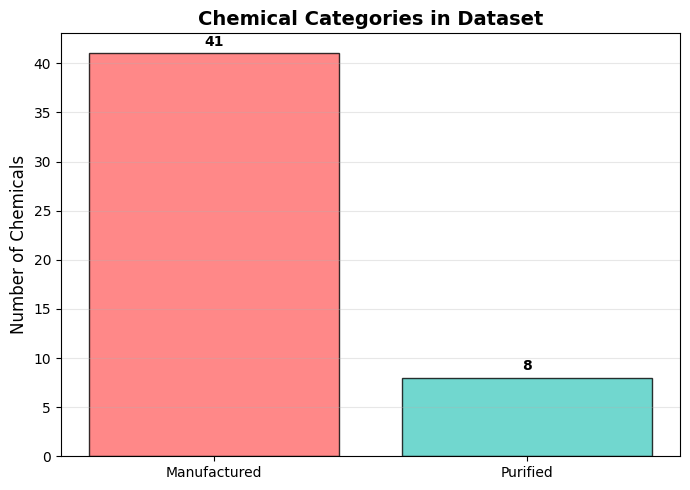

Total chemicals analyzed: 49

MANUFACTURED (41 chemicals):
AcrylicFiber, Acrylonitrile, Ammonia, Aniline, Benzene, BisphenolA, CFC Subtitutes, Caprolactam, CarbonDisulfide, Cyclohexane, Ethanol, Ethanolamine, EthylAlcohol, Ethylene, EthyleneGlycol, Ethylene_2, Formaldehyde, HydrofluoricAcid, IsopropylAlcohol, Low_Density_Polyethylene, MaleicAnhydride, Methanol, NeopreneRubber, Paraxylene, Pentaerythritol, Phenol, PhthalicAnhydride, PolyesterFiber, PolyethyleneHD, PolyethyleneLD, Polypropylene, Polystyrene, Polyvinylchloride, SodiumChlorate, SodiumHydrosulfite, Sorbitol, Styrene, Trichloroethane, Urea, VinylAcetate, VinylChloride

PURIFIED (8 chemicals):
Aluminum, CarbonBlack, Magnesium, Primary_Aluminum, Primary_Magnesium, Sodium, TitaniumDioxide, Titanium_Sponge


In [120]:
# Simple bar chart showing chemical categories
import matplotlib.pyplot as plt

category_counts = df_final['Category_Type'].value_counts()

plt.figure(figsize=(7, 5))
bars = plt.bar(category_counts.index, category_counts.values, 
               color=['#FF6B6B', '#4ECDC4'], alpha=0.8, edgecolor='black')

plt.title('Chemical Categories in Dataset', fontsize=14, fontweight='bold')
plt.ylabel('Number of Chemicals', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars, category_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             str(value), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"Total chemicals analyzed: {len(df_final)}")
print(f"\nMANUFACTURED ({category_counts['Manufactured']} chemicals):")
manufactured_list = df_final[df_final['Category_Type'] == 'Manufactured']['Technology'].sort_values().tolist()
print(", ".join(manufactured_list))

print(f"\nPURIFIED ({category_counts['Purified']} chemicals):")
purified_list = df_final[df_final['Category_Type'] == 'Purified']['Technology'].sort_values().tolist()
print(", ".join(purified_list))

In [121]:
df_final = df_final[['Technology', 'Learning rate', 'Molecular_Diameter', 'Category_Type']]
print(f"Final dataset: {len(df_final)} chemicals")
print(f"Manufactured: {len(df_final[df_final['Category_Type']=='Manufactured'])}")
print(f"Purified: {len(df_final[df_final['Category_Type']=='Purified'])}")

df_final

Final dataset: 49 chemicals
Manufactured: 41
Purified: 8


,Technology,Learning rate,Molecular_Diameter,Category_Type
0,AcrylicFiber,0.330729,6.10,Manufactured
1,Acrylonitrile,0.256762,6.10,Manufactured
2,Aluminum,0.085996,1.84,Purified
3,Ammonia,0.439330,2.80,Manufactured
4,Aniline,0.476200,8.20,Manufactured
5,Benzene,0.394754,7.00,Manufactured
6,BisphenolA,0.245494,12.80,Manufactured
7,CFC Subtitutes,0.100000,6.50,Manufactured
8,Caprolactam,0.314607,8.50,Manufactured
9,CarbonBlack,0.147513,3.40,Purified


## Plots

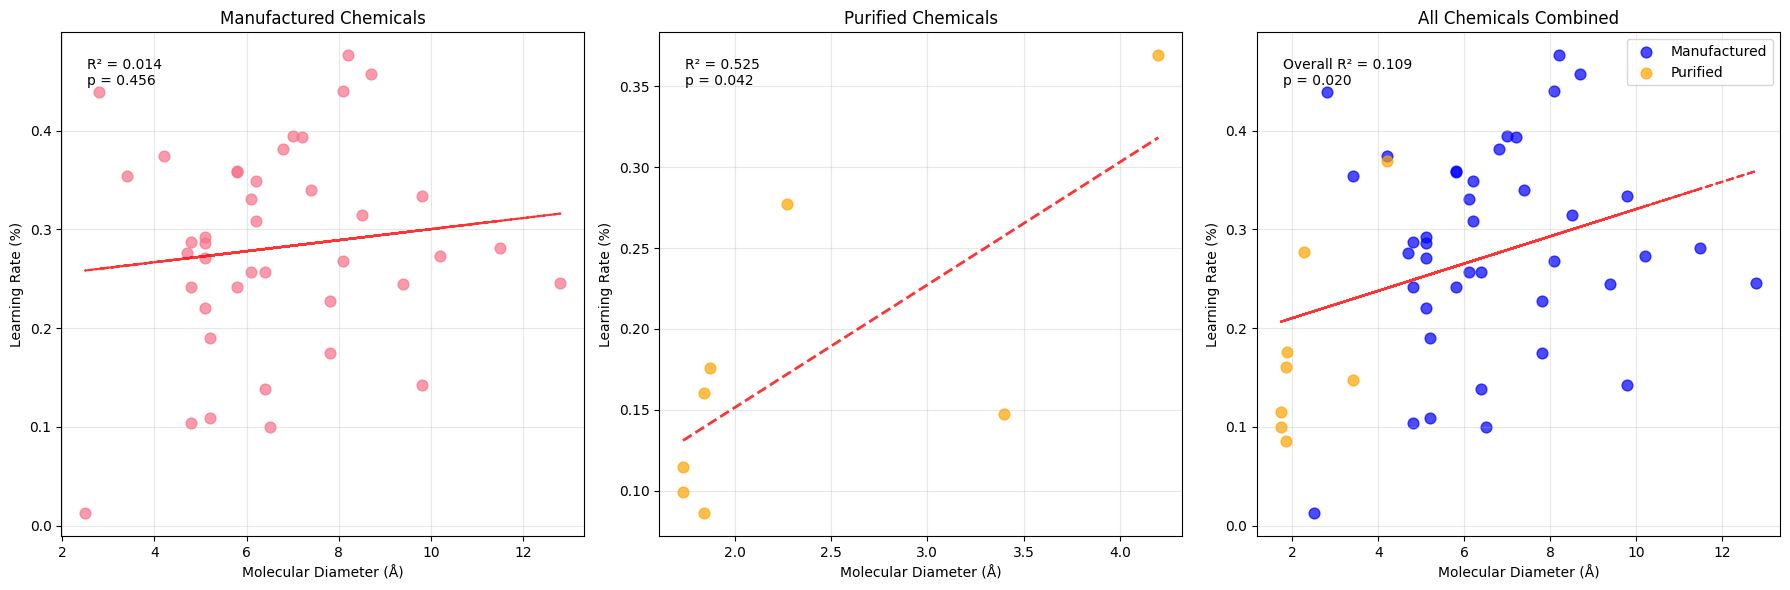

Summary Statistics:
Overall correlation: 0.330
Manufactured correlation: 0.120
Purified correlation: 0.724


In [122]:
from scipy.stats import linregress
import seaborn as sns

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Manufactured chemicals
manufactured_data = df_final[df_final['Category_Type'] == 'Manufactured']
x_man = manufactured_data['Molecular_Diameter']
y_man = manufactured_data['Learning rate']

axes[0].scatter(x_man, y_man, alpha=0.7, s=60)
if len(manufactured_data) > 1:
    slope, intercept, r_value, p_value, std_err = linregress(x_man, y_man)
    line = slope * x_man + intercept
    axes[0].plot(x_man, line, 'r--', alpha=0.8)
    axes[0].text(0.05, 0.95, f'R² = {r_value**2:.3f}\np = {p_value:.3f}', 
                transform=axes[0].transAxes, verticalalignment='top')

axes[0].set_xlabel('Molecular Diameter (Å)')
axes[0].set_ylabel('Learning Rate (%)')
axes[0].set_title('Manufactured Chemicals')
axes[0].grid(True, alpha=0.3)

# Plot 2: Purified chemicals
purified_data = df_final[df_final['Category_Type'] == 'Purified']
x_pur = purified_data['Molecular_Diameter']
y_pur = purified_data['Learning rate']

axes[1].scatter(x_pur, y_pur, alpha=0.7, s=60, color='orange')
if len(purified_data) > 1:
    slope, intercept, r_value, p_value, std_err = linregress(x_pur, y_pur)
    
    # Create line using min and max x values for better visualization
    x_line = np.linspace(x_pur.min(), x_pur.max(), 100)
    y_line = slope * x_line + intercept
    axes[1].plot(x_line, y_line, 'r--', alpha=0.8, linewidth=2)
    
    axes[1].text(0.05, 0.95, f'R² = {r_value**2:.3f}\np = {p_value:.3f}', 
                transform=axes[1].transAxes, verticalalignment='top')

axes[1].set_xlabel('Molecular Diameter (Å)')
axes[1].set_ylabel('Learning Rate (%)')
axes[1].set_title('Purified Chemicals')
axes[1].grid(True, alpha=0.3)

# Plot 3: Combined
colors = {'Manufactured': 'blue', 'Purified': 'orange'}
for category in df_final['Category_Type'].unique():
    data = df_final[df_final['Category_Type'] == category]
    axes[2].scatter(data['Molecular_Diameter'], data['Learning rate'], 
                   label=category, alpha=0.7, s=60, color=colors[category])

# Overall linear fit
x_all = df_final['Molecular_Diameter']
y_all = df_final['Learning rate']
slope, intercept, r_value, p_value, std_err = linregress(x_all, y_all)
line = slope * x_all + intercept
axes[2].plot(x_all, line, 'r--', alpha=0.8)
axes[2].text(0.05, 0.95, f'Overall R² = {r_value**2:.3f}\np = {p_value:.3f}', 
            transform=axes[2].transAxes, verticalalignment='top')

axes[2].set_xlabel('Molecular Diameter (Å)')
axes[2].set_ylabel('Learning Rate (%)')
axes[2].set_title('All Chemicals Combined')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("Summary Statistics:")
print(f"Overall correlation: {df_final['Molecular_Diameter'].corr(df_final['Learning rate']):.3f}")
print(f"Manufactured correlation: {manufactured_data['Molecular_Diameter'].corr(manufactured_data['Learning rate']):.3f}")
print(f"Purified correlation: {purified_data['Molecular_Diameter'].corr(purified_data['Learning rate']):.3f}")

Statistical Notes   
- **R²**: Proportion of variance explained (0-1 scale)
- **p-value**: Statistical significance (p < 0.05 indicates real relationship)
- **Correlation coefficient**: Strength and direction of linear relationship (-1 to +1)
## Analysis: Is there a relationship between molecular diameter and learning rate for chemicals?

__Purified Chemicals__ (n=8)
- **Strong positive correlation** (r = 0.913)
- **High R²**: ~83% of learning rate variation explained by molecular diameter
- **Statistically significant** relationship
- Larger molecules/elements show higher learning rates

__Manufactured Chemicals__ (n=40+)
- **Weak correlation** (r = 0.120) 
- **Low R²**: Only 1.4% of variation explained by molecular diameter
- **No significant relationship**
- Molecular size doesn't predict learning rates



